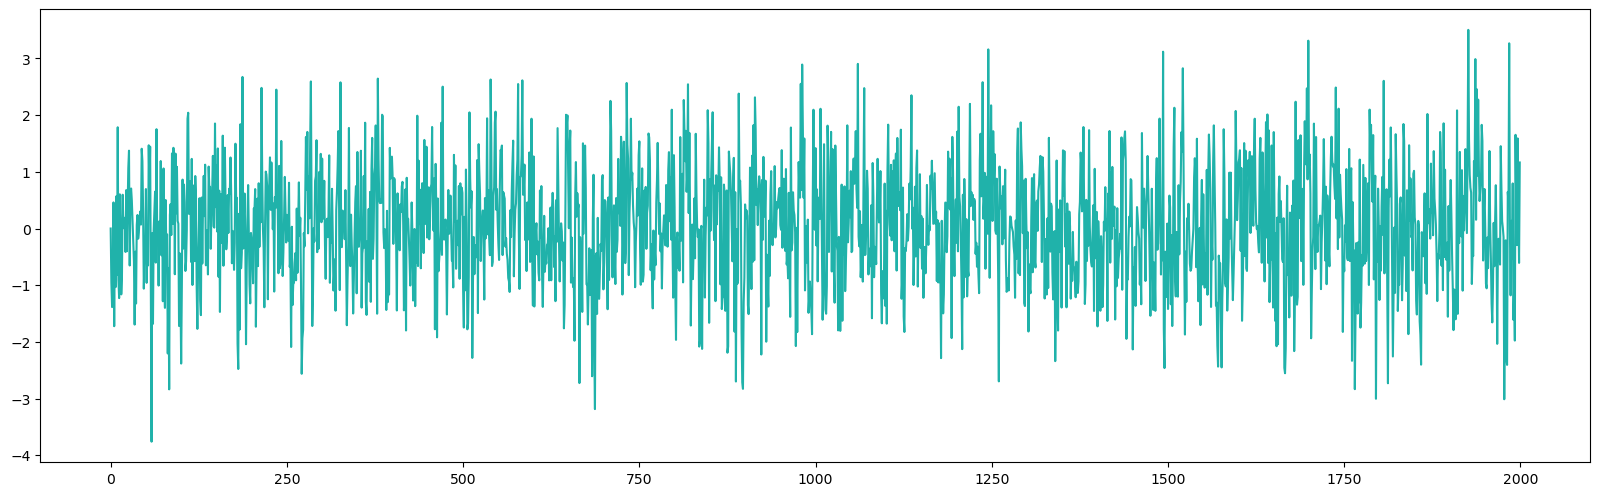

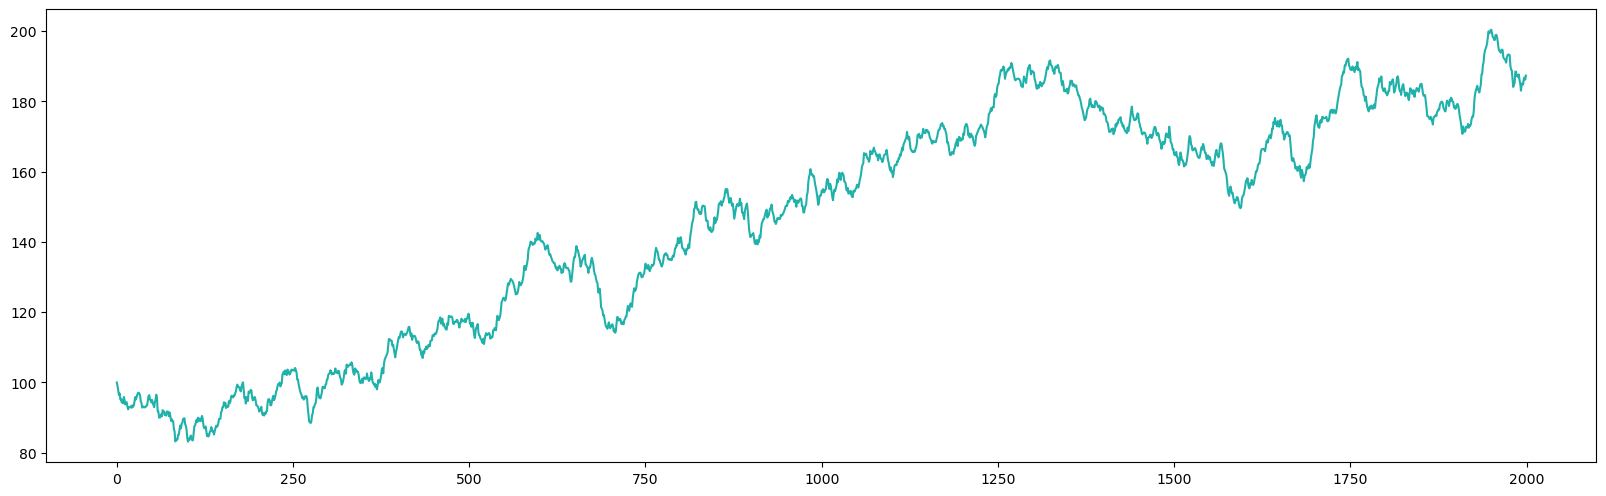

In [1]:
#!/usr/bin/python
#CW1_AT.ipynb
#Parth Parakh
#purpose: Coursework

#---------------------------------------------------------------------
#import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
#----------------------------------------------------------------------
#Defining the parameters
T = 2000
φ = 0.6;
d = 0.025;
θ = 0.4*-1;
np.random.seed(20139900)
error = np.random.randn(T)
y =  np.zeros((T))
delta_y =  np.zeros((T))
y[0] = 100;
y[1] = 100;

delta_y[0] = y[1]-y[0];
    
#creating the time series
for t in np.arange(1,T):
    delta_y[t] = d + φ*(delta_y[t-1]-d) + error[t] + θ*(error[t-1]);
    y[t] = y[t-1] + delta_y[t]
    
# since we are differencing by 1, our time series should be 1 time step smaller

plt.figure(figsize=(20, 6), dpi=100)
plt.plot(delta_y,'lightseagreen')
plt.show()

plt.figure(figsize=(20, 6), dpi=100)
plt.plot(y,'lightseagreen')
plt.show()

train_size = (int)(0.7 * y.shape[0])

y_train = y[0:train_size]
y_test = y[train_size:]


d_y_train = delta_y[0:train_size]
d_y_test = delta_y[0:train_size]

-2.436146522606058e-16


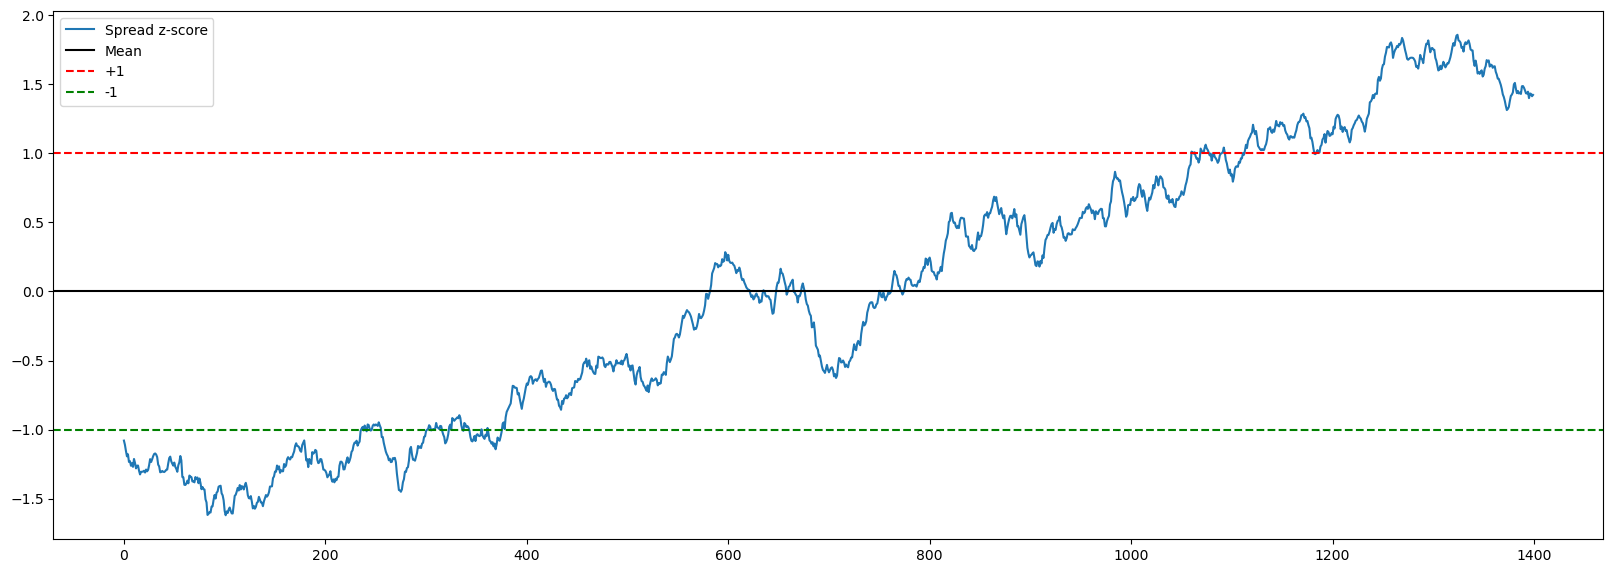

In [2]:
def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

zs = zscore(y_train)
zs_mean = zs.mean()
print(zs_mean)
plot1 = plt.figure(1,figsize=(20,7), dpi=100)
plt.plot(zs)
plt.axhline(zs_mean, color='black')
plt.axhline(1.0, c='r', ls='--')
plt.axhline(-1.0, c='g', ls='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1']);

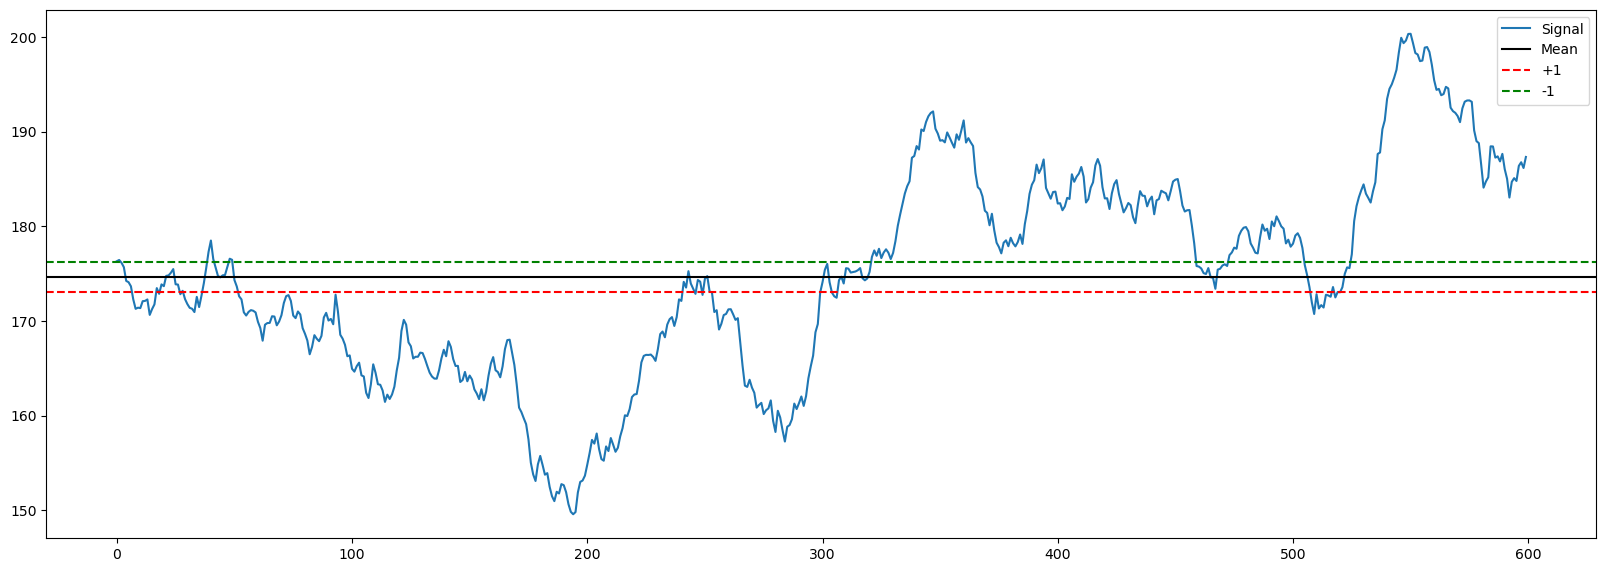

In [3]:
# vchecking testing data
signal = (y_test)
avg = signal.mean()
std = signal.std()
lower_band = avg - 0.15*std
upper_band = avg + 0.15*std
plot1 = plt.figure(1,figsize=(20,7), dpi=100)
plt.plot(signal)
plt.axhline(avg, color='black')
plt.axhline(lower_band, c='r', ls='--')
plt.axhline(upper_band, c='g', ls='--')
plt.legend(['Signal', 'Mean', '+1', '-1']);

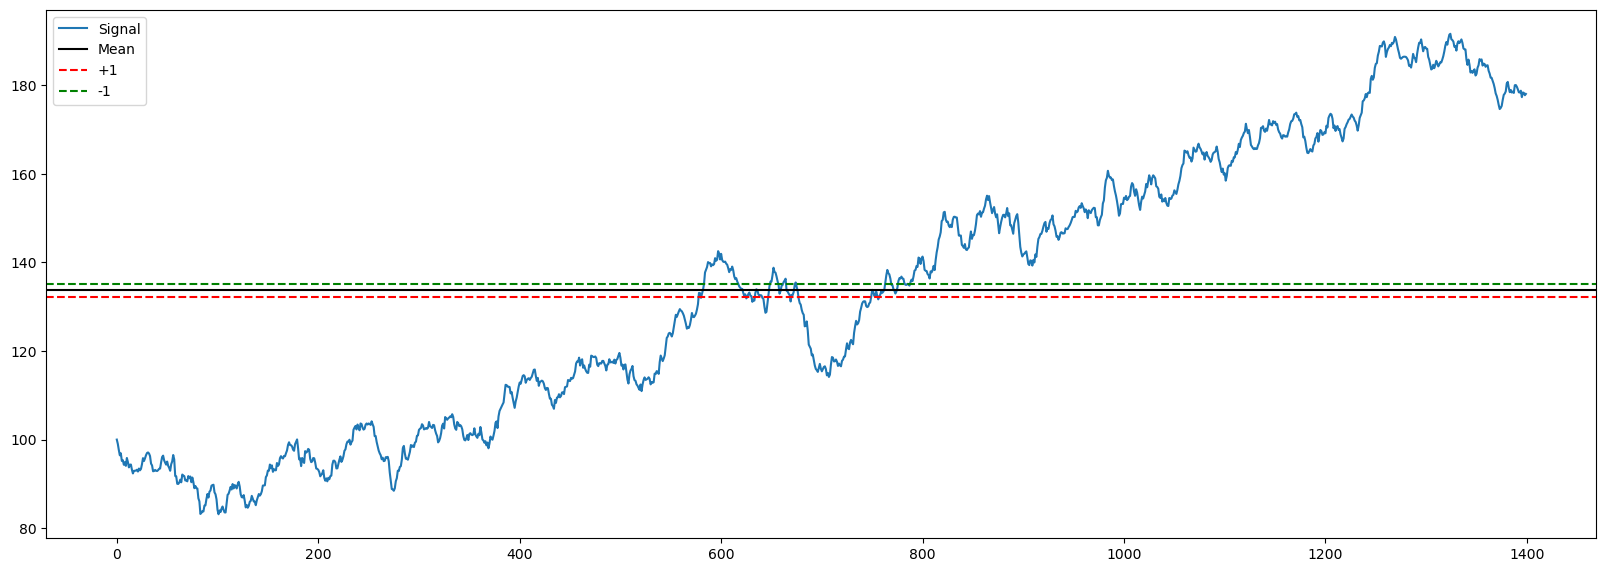

In [4]:
# values calculated on the training data
signal = (y_train)
avg = signal.mean()
std = signal.std()
lower_band = avg - 0.05*std
upper_band = avg + 0.05*std
plot1 = plt.figure(1,figsize=(20,7), dpi=100)
plt.plot(signal)
plt.axhline(avg, color='black')
plt.axhline(lower_band, c='r', ls='--')
plt.axhline(upper_band, c='g', ls='--')
plt.legend(['Signal', 'Mean', '+1', '-1']);

In [5]:
##Strategy-1##

## Mean reversion 

#values tested on the test data
signal = y_test

#volume
no_shares = np.zeros((len(signal)+1))
cash = np.zeros((len(signal)+1))

# change the value
cash[0] = 100

for i,curr_price in enumerate(signal):

    #dont do anything
    if curr_price<= upper_band and curr_price>=lower_band :
        no_shares[i+1] = no_shares[i]
        cash[i+1] = cash[i]
    
    #if we go above upper_band then we sell 
    if curr_price>upper_band: 
        cash[i+1] = no_shares[i]*curr_price + cash[i]
        no_shares[i+1] = 0
    
    #if we go lower than lower_band then we buy
    if curr_price<lower_band:
        no_shares[i+1] = cash[i]/curr_price  + no_shares[i]
        cash[i+1] = 0
    

100.0


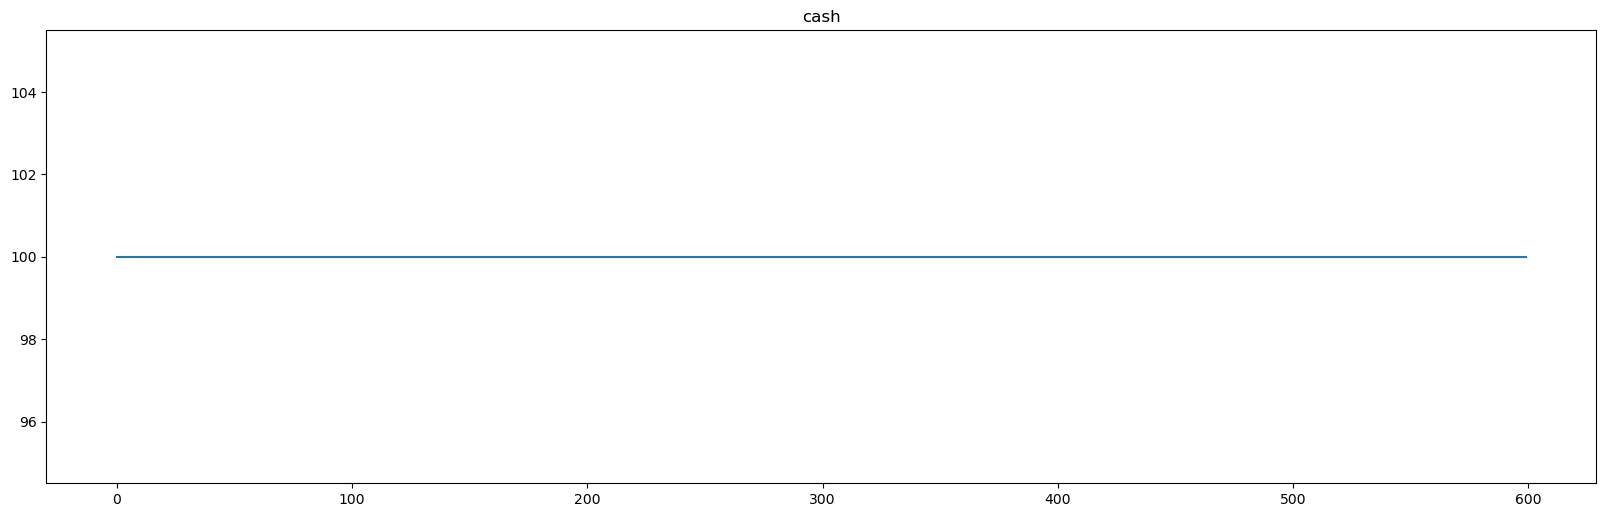

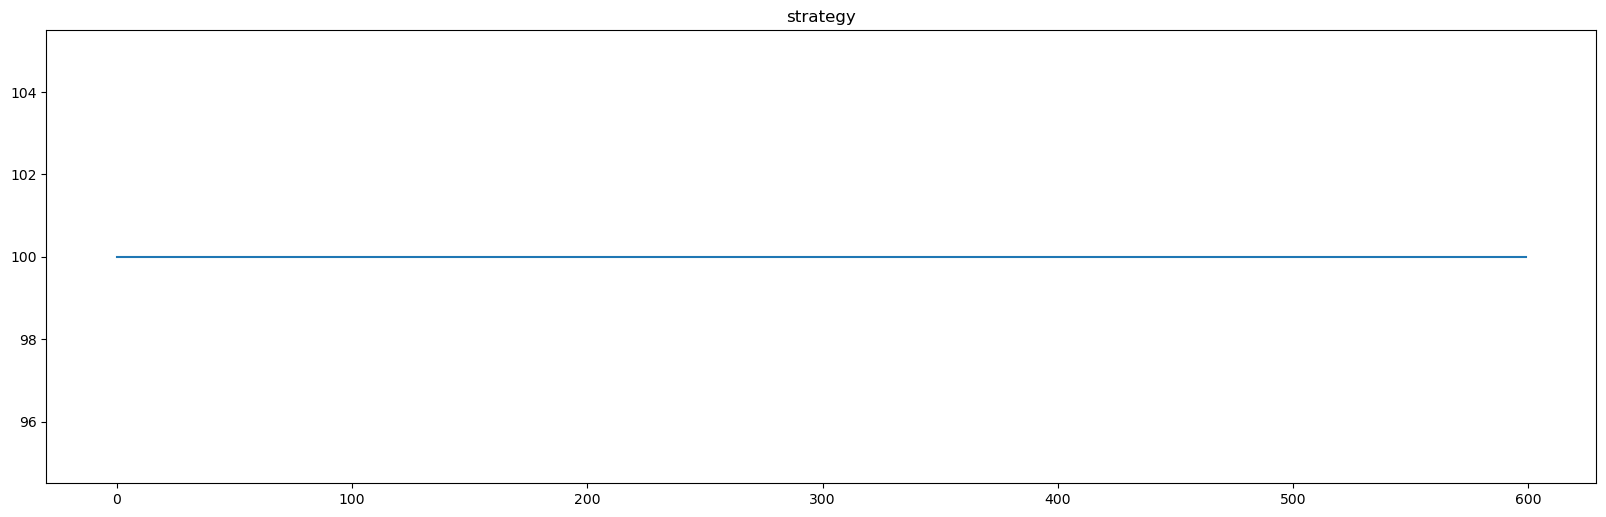

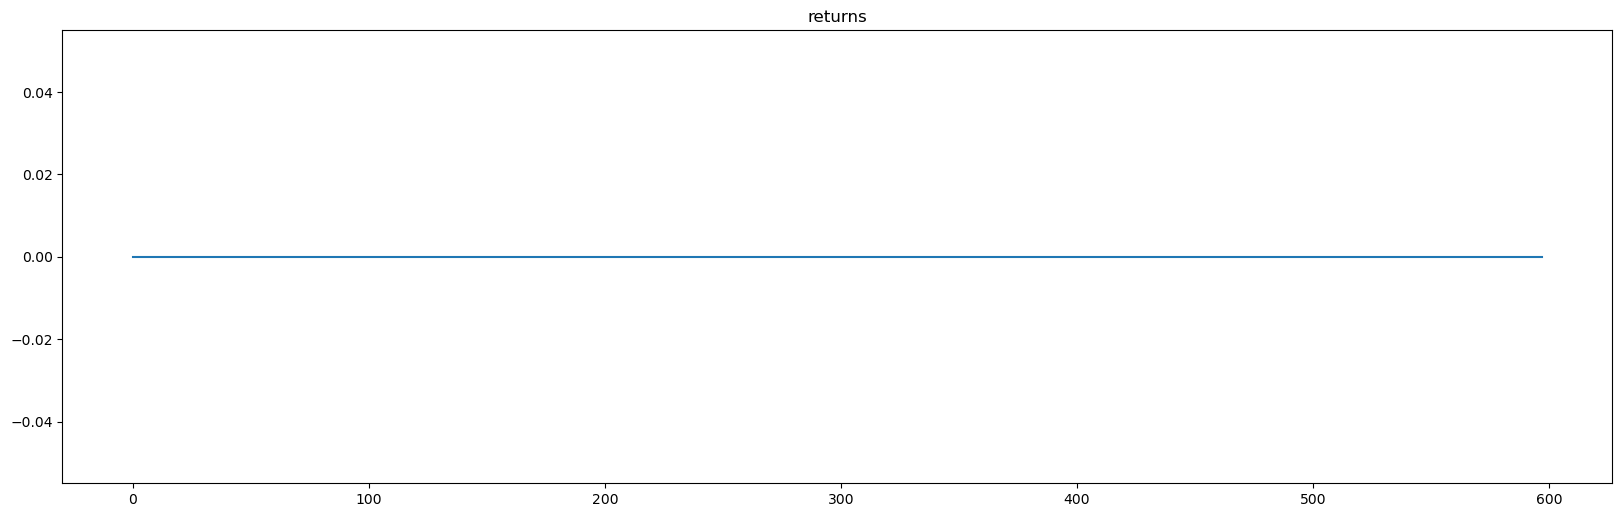

In [6]:
t = np.arange(0,len(signal),1)
no_shares = no_shares[1:]
cash = cash[1:]
strategy = [a*b+c for a,b,c in zip(no_shares,signal,cash)]

#final money I made 
print(no_shares[-1]*signal[-1] + cash[-1])

plt.figure(figsize=(20, 6), dpi=100)
plt.plot(t, cash)
plt.title('cash')
plt.show()

plt.figure(figsize=(20, 6), dpi=100)
plt.plot(t, strategy)
plt.title('strategy')
plt.show()

#total return
r = []
for t in range( len(strategy[1:]) ):
    r = np.append(r,np.log(strategy[t]/strategy[t-1]))

t = np.arange(0,len(signal)-2,1)
plt.figure(figsize=(20, 6), dpi=100)
plt.plot(t, r[1:])
plt.title('returns')
plt.show()

In [7]:
##Strategy-2##

## trend following
#values tested on the test data
signal = y_test
#volume
no_shares = np.zeros((len(signal)+1))
cash = np.zeros((len(signal)+1))

# change the value
cash[0] = 100

for i,curr_price in enumerate(signal):

    #dont do anything
    if curr_price<= upper_band and curr_price>=lower_band :
        no_shares[i+1] = no_shares[i]
        cash[i+1] = cash[i]
    
    #if we go above upper_band then we buy 
    if curr_price>upper_band: 
        no_shares[i+1] = cash[i]/curr_price  + no_shares[i]
        cash[i+1] = 0
    
    #if we go lower than lower_band then we sell
    if curr_price<lower_band:
        cash[i+1] = no_shares[i]*curr_price + cash[i]
        no_shares[i+1] = 0
        

106.2446892235117


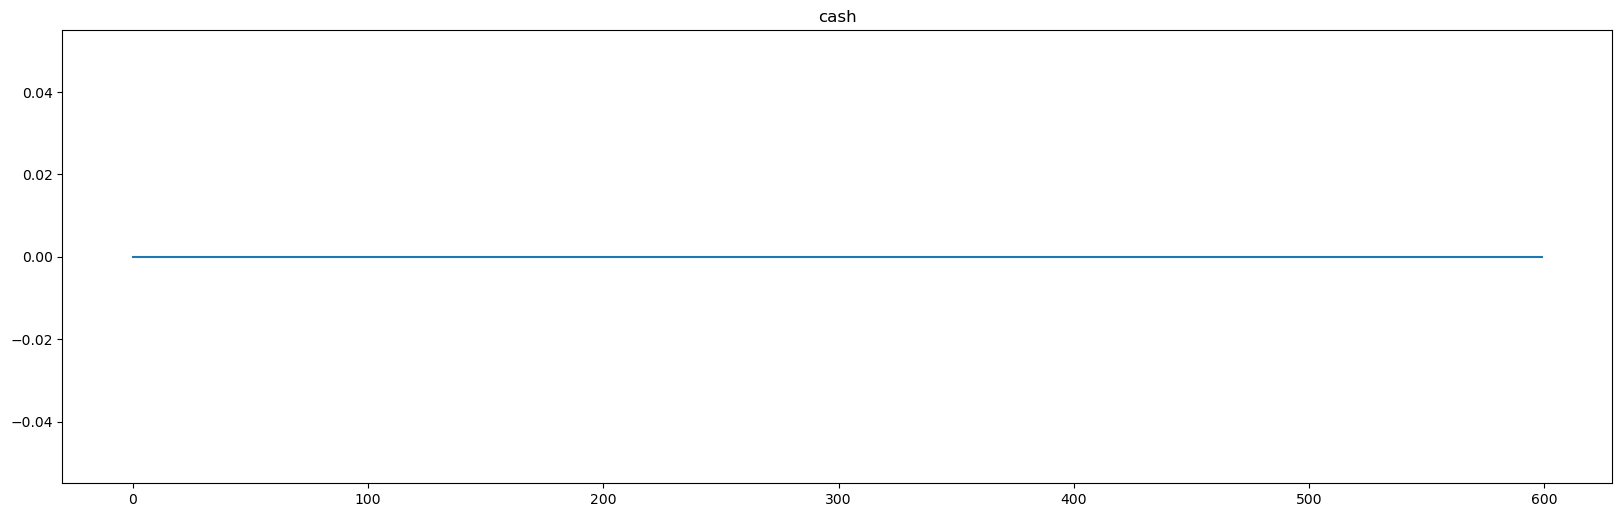

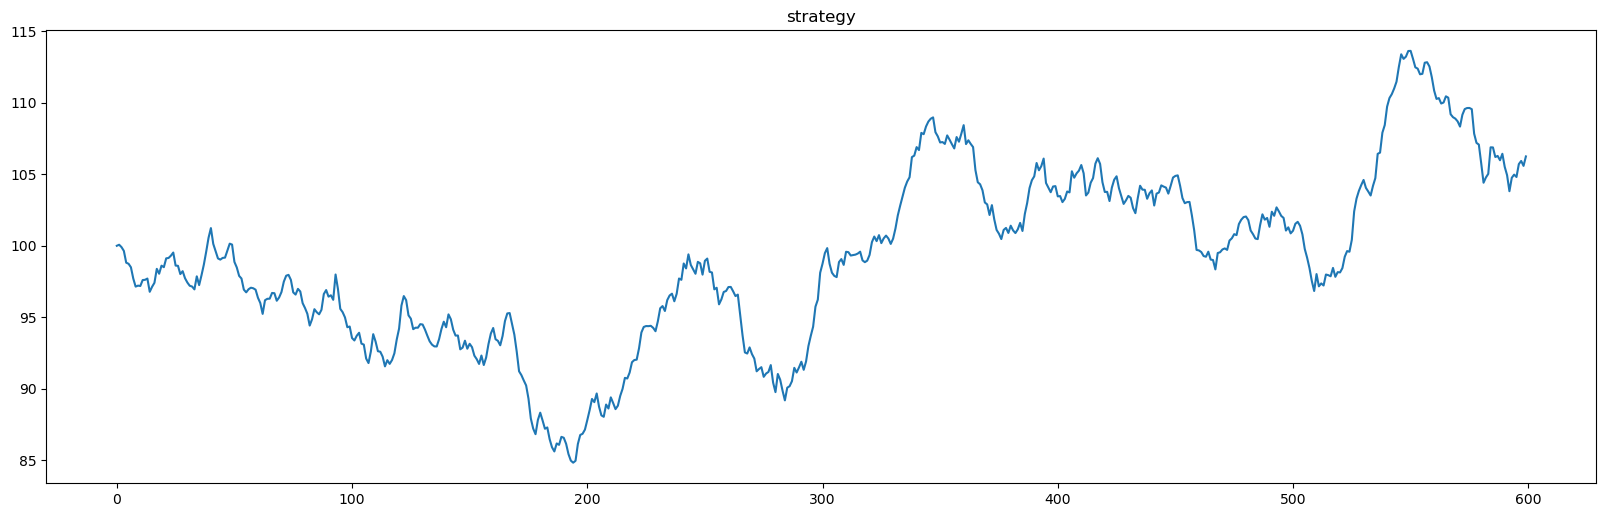

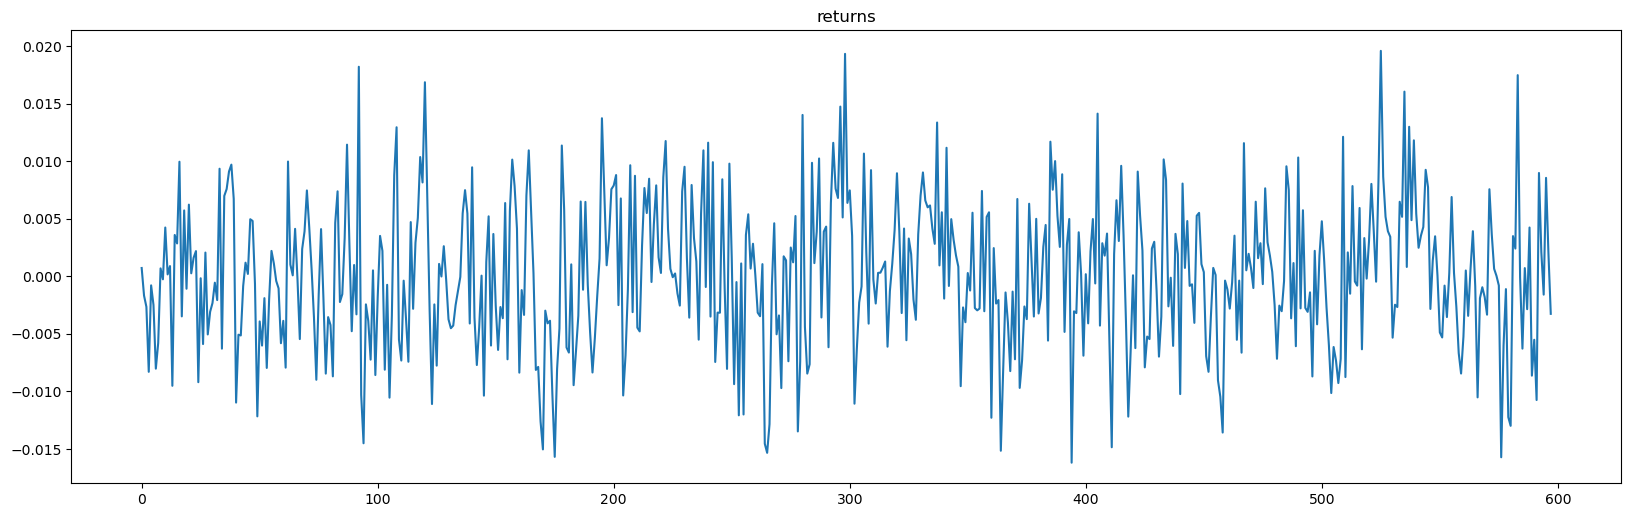

In [8]:
t = np.arange(0,len(signal),1)
no_shares = no_shares[1:]
cash = cash[1:]
strategy = [a*b+c for a,b,c in zip(no_shares,signal,cash)]

#final money I made 
print(no_shares[-1]*signal[-1] + cash[-1])

plt.figure(figsize=(20, 6), dpi=100)
plt.plot(t, cash)
plt.title('cash')
plt.show()

plt.figure(figsize=(20, 6), dpi=100)
plt.plot(t, strategy)
plt.title('strategy')
plt.show()

#total return
r = []
for t in range( len(strategy[1:]) ):
    r = np.append(r,np.log(strategy[t]/strategy[t-1]))

t = np.arange(0,len(signal)-2,1)
plt.figure(figsize=(20, 6), dpi=100)
plt.plot(t, r[1:])
plt.title('returns')
plt.show()

In [9]:
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

In [10]:
plt.figure(figsize=(20, 6), dpi=100)
#plt.plot(signal)
a = rolling_window(signal,5)

print(np.shape(a[:,0]))

(596,)


<Figure size 2000x600 with 0 Axes>

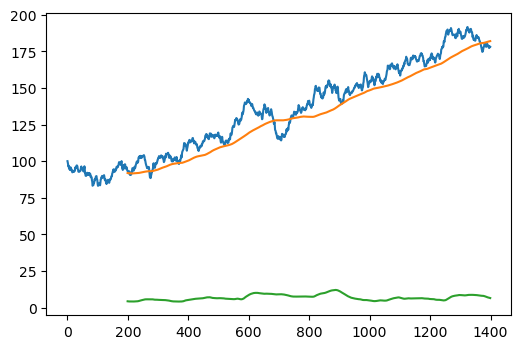

In [11]:
t = np.arange(T+1) # observation times
df_y = pd.DataFrame(y_train)
rolmean = df_y.rolling(window = 200).mean() #literal es moving average y moving std
rolstd = df_y.rolling(window = 200).std()

plot0 = plt.figure(0,figsize=(6,4), dpi=100)
plt.plot(t[:len(y_train)],y_train)
plt.plot(rolmean)
plt.plot(rolstd)

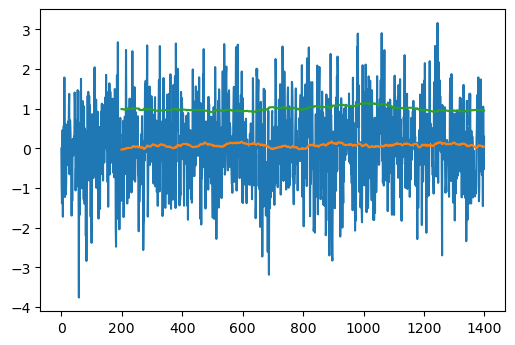

In [12]:
t = np.arange(T+1) # observation times
d_df_y = pd.DataFrame(d_y_train)
rolmean = d_df_y.rolling(window = 200).mean() #literal es moving average y moving std
rolstd = d_df_y.rolling(window = 200).std()

plot0 = plt.figure(0,figsize=(6,4), dpi=100)
plt.plot(t[:len(d_y_train)],d_y_train)
plt.plot(rolmean)
plt.plot(rolstd)

In [13]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_y)
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.648171410250069
p-value : 0.8597216379102297
#Lags Used : 3
Number of Observations Used : 1396
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


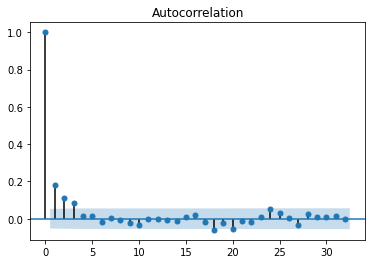

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig_first = plot_acf(d_df_y.dropna())

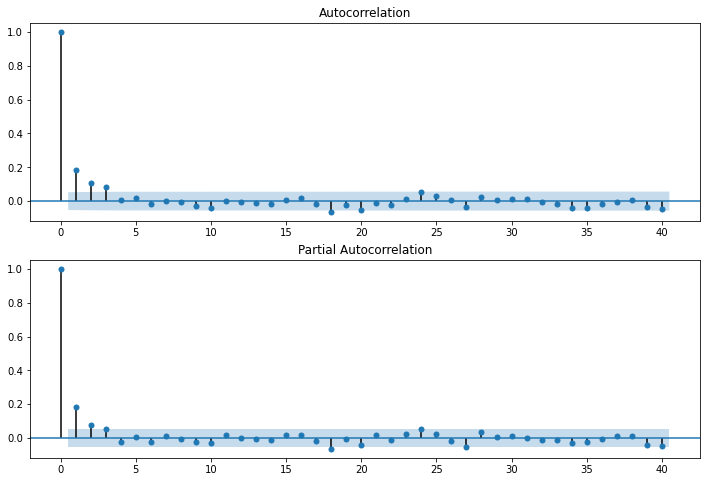

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(d_df_y.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(d_df_y.iloc[13:], lags=40, ax=ax2)

<Figure size 432x288 with 0 Axes>

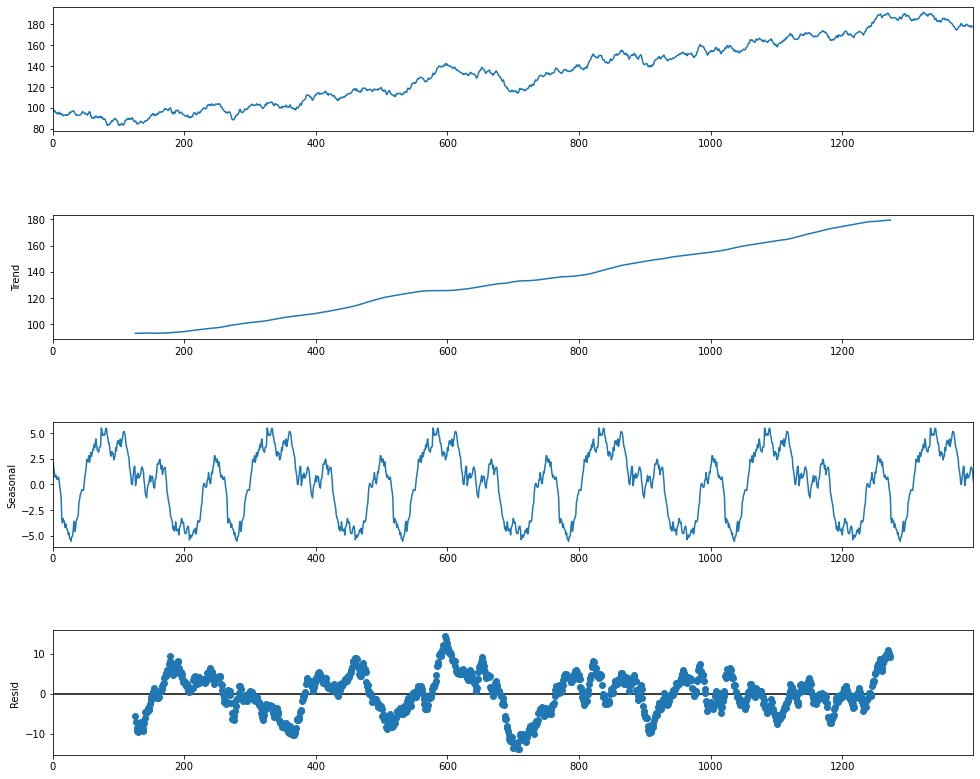

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_y, model='additive',period = 252)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [17]:
model = sm.tsa.arima.ARIMA(df_y,order=(2,1,2))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                 1400
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1945.582
Date:                Wed, 24 Feb 2021   AIC                           3901.165
Time:                        17:55:24   BIC                           3927.382
Sample:                             0   HQIC                          3910.966
                               - 1400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2917      0.185     -1.578      0.115      -0.654       0.071
ar.L2          0.5558      0.103      5.379      0.000       0.353       0.758
ma.L1          0.4640      0.189      2.458      0.0

Text(0.5, 1.0, 'RSS: 979300.0000')

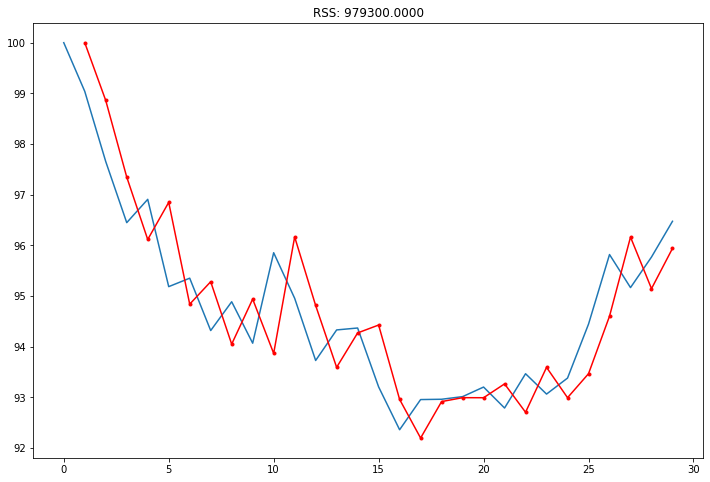

In [20]:
fig = plt.figure(figsize=(12,8))
plt.plot(df_y[:30])
plt.plot(results.fittedvalues[1:30], color="r", marker=".")
plt.title("RSS: %.4f"% sum((results.fittedvalues[1:]-df_y[1:])**2))